<a href="https://colab.research.google.com/github/AnasAkenoun/Probability_Transition_States/blob/main/Probability_Transition_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability_Transition States

```
# Выбран кодовый формат
```



0.13575


<ipython-input-1-0afe3aca122b>:59: ComplexWarning: Casting complex values to real discards the imaginary part
  E_array[:,i]=np.sort(eigenvalues)


[[ 0.        +0.j          6.51329759-0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +3.51901621j
   0.        +0.j          0.        +0.j        ]
 [ 6.51329759+0.j          0.        +0.j          0.        +3.51901621j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.        -3.51901621j  7.2       +0.j
   0.        +0.j          0.        +0.j         -2.53962526+0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.        +0.j          0.        +0.j
   7.2       +0.j          0.        +0.j          0.        +0.j
  -2.53962526+0.j          0.        +4.4945258j ]
 [ 0.        +0.j         -0.        +0.j          0.        +0.j
   0.        +0.j          7.2       +0.j          0.        +0.j
   0.        +4.4945258j  -2.53962526+0.j        ]
 [ 0.        -3.51901621j  0.        +0.j         -2.53962526-0.j
   

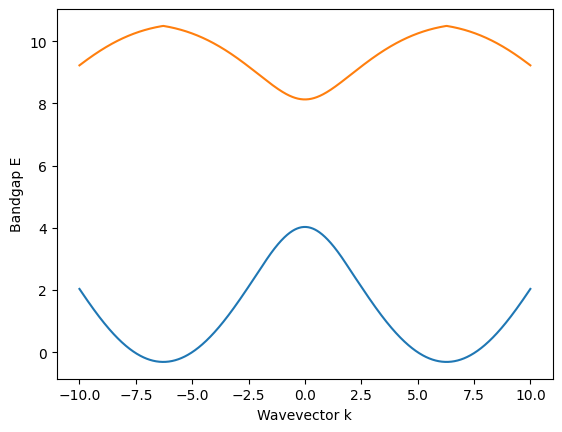

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  1.98201935e-16-1.29627875e-17j -1.98201935e-16+1.29627875e-17j
 -3.93946403e-01+3.66120009e-01j  7.03498339e-01+0.00000000e+00j]
[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.70710678+0.j          0.70710678+0.j
 -0.20687558+0.40983517j -0.07008005-0.01337435j]


In [1]:
###################   Energy bands of Si crystal   ####################
import numpy as np
from scipy.sparse.linalg import eigs

import math

a =  0.543 # in A
print(a/4)
# Define the different spacing d, for neighbors

d1 = np.multiply([1,1,1],(1/4))
d2 = np.multiply([1,-1,-1],(1/4))
d3 = np.multiply([-1,1,-1],(1/4))
d4 = np.multiply([-1,-1,1],(1/4))

# Define the wavevectors k1,k2,k3 and k

k_min = -10
#k_max = (1/4)*(2*math.pi/a)
k_max = 10

nk = 1000
k_array = np.linspace(k_min, k_max, nk)
E_array = np.zeros((8,nk))



# Defining the potentials and the energies

Vss=-8.13; Vsp=5.88 ; Vxx=3.17; Vxy=7.51


Es_Ek = 0
Ep_Es = 7.20
Ep_Ek = Ep_Es

# Constructing the matrix M for each value of  and diagonalizing it

for i in range(nk):
    k = [k_array[i],0,0]
    #print(k)
    g1 = (1/4)*(np.exp(1j*(np.dot(d1,k)))+np.exp(1j*(np.dot(d2,k)))+np.exp(1j*(np.dot(d3,k)))+np.exp(1j*(np.dot(d4,k))))
    g2 = (1/4)*(np.exp(1j*(np.dot(d1,k)))+np.exp(1j*(np.dot(d2,k)))-np.exp(1j*(np.dot(d3,k)))-np.exp(1j*(np.dot(d4,k))))
    g3 = (1/4)*(np.exp(1j*(np.dot(d1,k)))-np.exp(1j*(np.dot(d2,k)))+np.exp(1j*(np.dot(d3,k)))-np.exp(1j*(np.dot(d4,k))))
    g4 = (1/4)*(np.exp(1j*(np.dot(d1,k)))-np.exp(1j*(np.dot(d2,k)))-np.exp(1j*(np.dot(d3,k)))+np.exp(1j*(np.dot(d4,k))))
    #print((np.dot(d1,k)))
    S1 = np.array([Es_Ek,Vss*g1,0,0,0,Vsp*g2,Vsp*g3,Vsp*g4])
    S2 = np.array([Vss*np.conjugate(g1),Es_Ek,-Vsp*np.conjugate(g2),-Vsp*np.conjugate(g3),-Vsp*np.conjugate(g4),0,0,0])
    X1 = np.array([0,-Vsp*g2,Ep_Ek,0,0,Vxx*g1,Vxy*g4,Vxy*g3])
    Y1 = np.array([0,-Vsp*g3,0,Ep_Ek,0,Vxy*g4,Vxx*g1,Vxy*g2])
    Z1 = np.array([0,-Vsp*g4,0,0,Ep_Ek,Vxy*g3,Vxy*g2,Vxx*g1])
    X2 = np.array([Vsp*np.conjugate(g2),0,Vxx*np.conjugate(g1),Vxy*np.conjugate(g4),Vxy*np.conjugate(g3),Ep_Ek,0,0])
    Y2 = np.array([Vsp*np.conjugate(g3),0,Vxy*np.conjugate(g4),Vxx*np.conjugate(g1),Vxy*np.conjugate(g2),0,Ep_Ek,0])
    Z2 = np.array([Vsp*np.conjugate(g4),0,Vxy*np.conjugate(g3),Vxy*np.conjugate(g2),Vxx*np.conjugate(g1),0,0,Ep_Ek])

    M = np.array([S1, S2, X1, Y1, Z1, X2, Y2, Z2], dtype='complex_')
    eigenvalues, eigenvectors = np.linalg.eig(M)
    #print(eigenvalues)
    E_array[:,i]=np.sort(eigenvalues)

print(M)


print(eigenvectors[3,:])

# Plotting the bandgap E vs k

import matplotlib.pyplot as plt

plt.plot(k_array, E_array[3,:])
plt.plot(k_array, E_array[4,:])



plt.xlabel('Wavevector k')
plt.ylabel('Bandgap E')
plt.show()


## Let's calculate the corresponding eigenvectors for the sorted eigenvalues

eig=np.zeros((8,nk)) ## New 2darray tp store the eigenvectors
for j in range(8):
  for i in range(8):
    if (np.dot(M,eigenvectors[i,:])==np.dot(E_array[:,j],eigenvectors[i,:])).all():
      eig[i,:]=eigenvectors[j,:]
      eigenvectors[j,:]=eigenvectors[i,:]


print(eigenvectors[4,:])
print(eigenvectors[3,:])


In [2]:
## Calculation of the probability of transition

### Case 1: Where the psi_i_1 and psi_i are the eigenvectors of the states we're interested in

# Choice of the states
 ## Current state
n_i_1=3
 ## Next state
n_i=4

# Wavefunction of the electron corresponding to the state 3
psi_i_1= np.matrix(eigenvectors[n_i_1,:])

# Wavefunction of the electron corresponding to the state 4
psi_i= np.matrix(eigenvectors[n_i,:])
# Probablity is given by:
prob= psi_i_1 * (psi_i.getH())
print(prob)
print("The probability of transition between %i" %(n_i_1),"and %i" %(n_i),"is", float(np.abs((prob))**2))




[[0.18224554-0.09512064j]]
The probability of transition between 3 and 4 is 0.042261374226382487


In [3]:
## Case 2: Where the A(Magnetic field) and P(Momentum) are taking into consideration

h=0.66 # # Planck's constant in eV.Fs
pi = math.pi  # Value of pi
h_=h/2*pi
m_e=1/2000 ## mass of electron in amu
A0 = 1  # Define the magnetic potential amplitude
k = k_array  # Define the wave vector k value
dx= a/nk # Define the value of dx

x = 0  # Define the position r value

x = np.linspace(-a,a,nk)

#Let's define the eigenstates(based on the calculated eigenvectors)
##Empty 2darray
psi=np.zeros((8,8))
##Fill up loop
for i in range(8):
  psi[:,i]= eigenvectors[:,i]


#Momentum list
P_ = np.zeros((8,8))
for i in range(1, 7):
    j = i - 1
    z=(np.matrix(psi[i + 1, :].T).getH() + np.matrix(psi[i - 1, :].T).getH() - 2 * np.matrix(psi[i, :].T).getH())
    P_= -(h_ ** 2 / (2 * m_e)) * (z / dx ** 2)

P = P_
print(P)


# Define the momentum P of our system
P=P_
# Define the magnetic potential A
A = A0 * np.exp(-1j * np.dot(k,x))

# Choice of the states
 ## Current state
n_i_1=3
 ## Next state
n_i=4


# Wavefunction of the electron corresponding to the state 3
psi_i_1= np.matrix(psi[n_i_1,:].T)
# Wavefunction of the electron corresponding to the state 4
psi_i= np.matrix(psi[n_i,:].T)
# Probablity is given by:

# Calculate the probability of transitions between different levels due to energy
probabilities = np.zeros((8,8))
for n_i_1 in range(8):
    for n_i in range(8):
        if n_i_1 == n_i:
            probabilities[n_i_1, n_i] = 0
        else:
            psi_i_1 = np.matrix(psi[n_i_1,:])
            psi_i = np.matrix(psi[n_i,:])
            d = np.dot(psi_i_1, A)
            prob = np.dot(d, P)
            probabilities[n_i_1, n_i] = np.abs(prob)
c=0
for i in range(1,8):
   c+=probabilities[i-1,i]

c

d=np.dot((np.matrix(psi[n_i_1,:].T)),A)



prob= np.dot(d,P)/c


print(np.matrix(psi[n_i_1,:].T))
print((prob))
print("The probability of transition between %i" %(n_i_1),"and %i" %(n_i),"is", float(np.abs((prob))))

[[-1.10334207e-08]
 [-2.04150355e+09]
 [-1.56748341e-08]
 [-2.52396532e+09]
 [ 2.53606429e+09]
 [-2.53606429e+09]
 [ 1.05871649e+09]
 [-1.55535147e+09]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.55111512e-17 -1.11022302e-16  5.50613368e-01  3.57727139e-01]]
[[-0.00216636+0.0028727j]]
The probability of transition between 7 and 7 is 0.0035979898967640604


<ipython-input-3-7d30f9b9de06>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  psi[:,i]= eigenvectors[:,i]


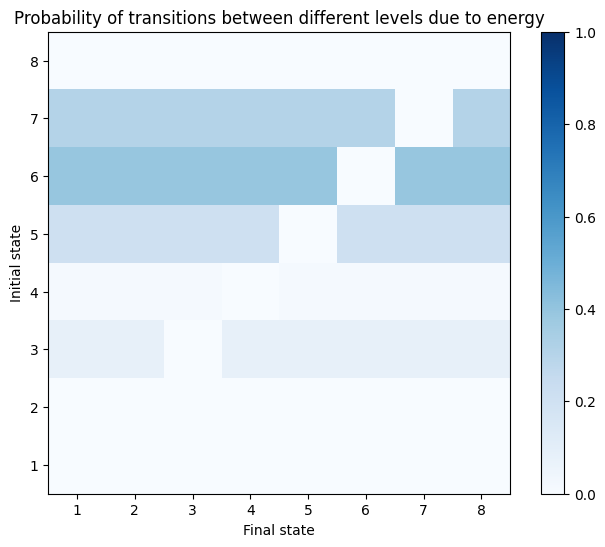

In [4]:
# Calculate the probability of transitions between different levels due to energy
probabilities = np.zeros((8,8))
for n_i_1 in range(8):
    for n_i in range(8):
        if n_i_1 == n_i:
            probabilities[n_i_1, n_i] = 0
        else:
            psi_i_1 = np.matrix(psi[n_i_1,:])
            psi_i = np.matrix(psi[n_i,:])
            d = np.dot(psi_i_1, A)
            prob = np.dot(d, P)
            probabilities[n_i_1, n_i] = np.abs(prob)
c=0
for i in range(1,8):
   c+=probabilities[i-1,i]

c

# Plot the probability of transitions between different levels due to energy
plt.figure(figsize=(8, 6))
plt.imshow(probabilities/c, cmap='Blues', origin='lower', vmin=0, vmax=1)
plt.colorbar()
plt.xticks(np.arange(8), np.arange(1, 9))
plt.yticks(np.arange(8), np.arange(1, 9))
plt.xlabel('Final state')
plt.ylabel('Initial state')
plt.title('Probability of transitions between different levels due to energy')
plt.show()


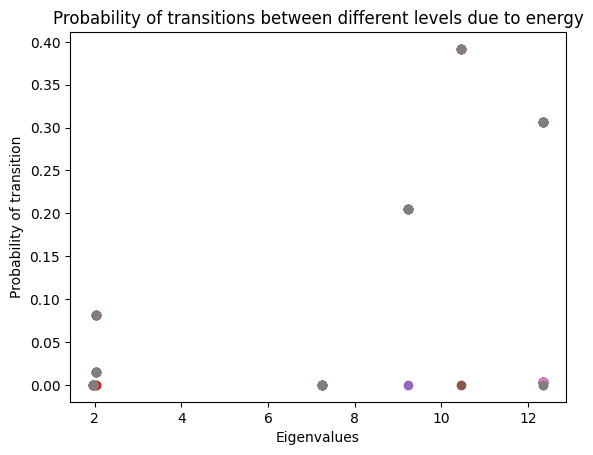

In [5]:
plt.plot(np.abs(E_array[:,0]),probabilities/c,'o')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability of transition')
plt.title('Probability of transitions between different levels due to energy')
plt.show()
